In [1]:
#import the imdb review dataset object
from keras.datasets import imdb

2022-10-24 19:56:23.813012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load the top 10000 words (as indices of a word dict) from each review, by relevance and assign to test and training data/labels
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# for demo purposes, get the dict showing each 'word': index key-value pair
word_index = imdb.get_word_index()

In [4]:
# invert key-value relationship
reverse_word_index = dict(
[(value, key) for key, value in word_index.items()])

In [5]:
# convert first review from index list to sentence
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [6]:
import numpy as np

In [7]:
# function to manually create binary vector/mask of each review, each 10000 long.
def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
# convert binary labels to float32 arrays (length and dims do not change)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# start building network
from keras import models, layers

In [11]:
# sequential model with 2 hidden dense layers of 16 units each, with relu activation, and a final dense 
# layer with a scalar output, with sigmoid activation.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-10-24 19:56:32.080211: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# specifying optimizer, loss function, and evaluation metric
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [13]:
# it's also possible to give custom configurations or even custom optimizers/loss functions/metrics
from keras import optimizers, losses, metrics
model.compile(
    optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [14]:
# split training set into validation and partial training
validation_size = 10000

x_val = x_train[:validation_size]
partial_x_train = x_train[validation_size:]

y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

In [15]:
# train model, passing validation data as argument
# specifying optimizer, loss function, and evaluation metric
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']) # seems to be different from 'binary_accuracy'

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 27ms/step - loss: 0.5543 - acc: 0.7807 - val_loss: 0.4525 - val_acc: 0.8214
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3492 - acc: 0.8945 - val_loss: 0.3320 - val_acc: 0.8828
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2559 - acc: 0.9202 - val_loss: 0.2912 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1997 - acc: 0.9368 - val_loss: 0.2755 - val_acc: 0.8903
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1623 - acc: 0.9486 - val_loss: 0.2747 - val_acc: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1327 - acc: 0.9611 - val_loss: 0.2981 - val_acc: 0.8823
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1121 - acc: 0.9670 - val_loss: 0.2978 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0929 - a

In [16]:
# model.fit returns a History object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

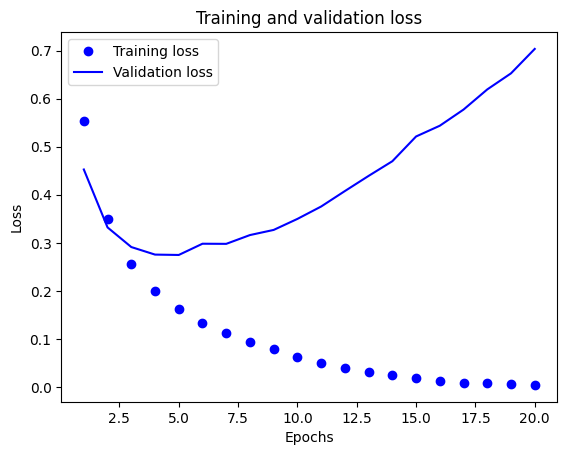

In [17]:
# plot training against validation metrics

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

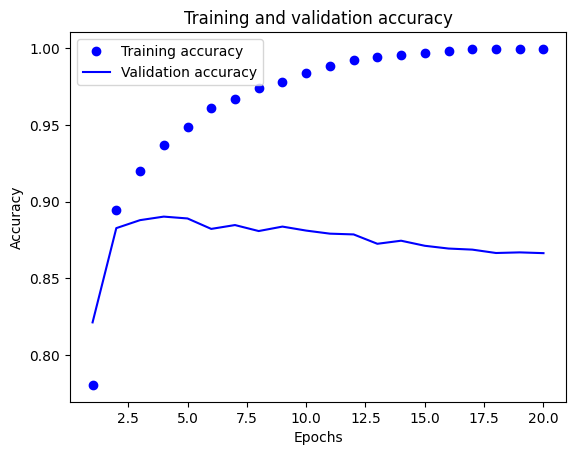

In [18]:
# plot training and validation accuracy
plt.clf() # clear plot figures
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
# Training process above, we have overfitting — the model performs well with the training data but not with new one

In [20]:
# training again and (naively) stopping at 4th epoch (or nth-epoch where validation peaks)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.2116 - accuracy: 0.9480
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1337 - accuracy: 0.9597
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1030 - accuracy: 0.9690
Epoch 4/4
782/782 [==============================] - 1s 916us/step - loss: 0.5105 - accuracy: 0.8566


In [21]:
# performing predictions on unseen data
model.predict(x_test)

782/782 [==============================] - 1s 807us/step


array([[0.00567716],
       [1.        ],
       [0.72501016],
       ...,
       [0.0517085 ],
       [0.02945533],
       [0.74091315]], dtype=float32)

In [22]:
# What follows are some parameter variations to see how results change

In [23]:
# define a helper function
def quick_model_test(num_hidden_layers=2, num_units=16, loss_function='binary_crossentropy', activation='relu'):
    model = models.Sequential()
    model.add(layers.Dense(num_units, activation=activation, input_shape=(10000,)))
    for i in range(num_hidden_layers - 1):
        model.add(layers.Dense(num_units, activation=activation))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss=loss_function,
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
    print(f'loss and accuracy: {results}')

In [24]:
# 3 layer model
quick_model_test(num_hidden_layers=3)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.5138 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2867 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2097 - accuracy: 0.9256
Epoch 4/4
782/782 [==============================] - 1s 924us/step - loss: 0.3090 - accuracy: 0.8799
loss and accuracy: [0.30899444222450256, 0.8798800110816956]


In [25]:
# 1 layer model
quick_model_test(num_hidden_layers=1)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4477 - accuracy: 0.8286
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2789 - accuracy: 0.9059
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2204 - accuracy: 0.9264
Epoch 4/4
782/782 [==============================] - 1s 916us/step - loss: 0.2828 - accuracy: 0.8872
loss and accuracy: [0.28282561898231506, 0.8871999979019165]


In [26]:
# 32-unit model
quick_model_test(num_units=32)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4371 - accuracy: 0.8272
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2454 - accuracy: 0.9117
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9310
Epoch 4/4
782/782 [==============================] - 1s 912us/step - loss: 0.3137 - accuracy: 0.8790
loss and accuracy: [0.31372442841529846, 0.8789600133895874]


In [27]:
# 64-unit model
quick_model_test(num_units=64)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4235 - accuracy: 0.8170
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2375 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1764 - accuracy: 0.9322
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3594 - accuracy: 0.8644
loss and accuracy: [0.35937994718551636, 0.864359974861145]


In [28]:
# mse loss function
quick_model_test(loss_function='mse')

Epoch 1/4
49/49 [==============================] - 3s 8ms/step - loss: 0.1456 - accuracy: 0.8280
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0771 - accuracy: 0.9096
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.0584 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 1s 915us/step - loss: 0.0886 - accuracy: 0.8806
loss and accuracy: [0.08861923217773438, 0.8805999755859375]


In [29]:
quick_model_test(activation='tanh')

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4170 - accuracy: 0.8284
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2287 - accuracy: 0.9155
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1735 - accuracy: 0.9353
Epoch 4/4
782/782 [==============================] - 1s 945us/step - loss: 0.3585 - accuracy: 0.8671
loss and accuracy: [0.3584569990634918, 0.8671200275421143]
